In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#!pip install scikit-learn --upgrade
from keras import Model
from sklearn.decomposition import PCA


In [ ]:
#import data
df1 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero.csv')
df2 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_9.csv')
df10 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_10.csv')
df11 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_andrea.csv')
df12 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_christian.csv')
df13 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_valerio.csv')
df14 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_beste.csv')
df15 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giovanni.csv')
df16 = pd.read_csv('/content/drive/MyDrive/MPUTOYDATA/dati_giampiero_test.csv')


#buona config treaining solo me, val christian

In [ ]:
#removing all the data before the start of the protocol - run only one time!!
df1 = df1[df1.iloc[:, 9] != 'Null']
df2 = df2[df2.iloc[:, 9] != 'Null']
df3 = df3[df3.iloc[:, 9] != 'Null']
df4 = df4[df4.iloc[:, 9] != 'Null']
df5 = df5[df5.iloc[:, 9] != 'Null']
df6 = df6[df6.iloc[:, 9] != 'Null']
df7 = df7[df7.iloc[:, 9] != 'Null']
df8 = df8[df8.iloc[:, 9] != 'Null']
df9 = df9[df9.iloc[:, 9] != 'Null']
df10 = df10[df10.iloc[:, 9] != 'Null']
df11 = df11[df11.iloc[:, 9] != 'Null']
df12 = df12[df12.iloc[:, 9] != 'Null']
df13 = df13[df13.iloc[:, 9] != 'Null']
df14 = df14[df14.iloc[:, 9] != 'Null']
df15 = df15[df15.iloc[:, 9] != 'Null']
df16 = df16[df16.iloc[:, 9] != 'Null']
#------removing first value for capturing variation of the data respect to the starting moment
def subtract_first_row(df):
    first_row_numeric = df.iloc[0, :-1]
    df_subtracted = df.copy()
    df_subtracted.iloc[:, :-1] = df_subtracted.iloc[:, :-1].subtract(first_row_numeric, axis='columns')
    return df_subtracted

df1 = subtract_first_row(df1)
df2 = subtract_first_row(df2)
df3 = subtract_first_row(df3)
df4 = subtract_first_row(df4)
df5 = subtract_first_row(df5)
df6 = subtract_first_row(df6)
df7 = subtract_first_row(df7)
df8 = subtract_first_row(df8)
df9 = subtract_first_row(df9)
df10 = subtract_first_row(df10)
df11 = subtract_first_row(df11)
df12 = subtract_first_row(df12)
df13 = subtract_first_row(df13)
df14 = subtract_first_row(df14)
df15 = subtract_first_row(df15)
df16 = subtract_first_row(df16)
#------
# Funzione per applicare una media mobile
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()


df_train = pd.concat([df1, df2, df3, df4, df5, df6, df7,df8,df9,df10], ignore_index=True)
df_val = df16
df_test = pd.concat([df11, df12, df13, df14, df15], ignore_index=True)

df_train.dropna(inplace=True)
df_val.dropna(inplace=True)
df_test.dropna(inplace=True)
df_train = df_train[['Eulerx','Gyroy','Gyroz','Label']]
df_test = df_test[['Eulerx','Gyroy','Gyroz','Label']]
df_val = df_val[['Eulerx','Gyroy','Gyroz','Label']]

In [ ]:
print(df_train)


            Eulerx      Gyroy      Gyroz Label
0              0.0        0.0        0.0     3
1              0.0        0.0        0.0     3
2              0.0        0.0        0.0     3
3              0.0        0.0        0.0     3
4              0.0        0.0        0.0     3
...            ...        ...        ...   ...
147003  122.823529 -54.901961   27.45098     0
147004  121.411764 -39.215687  11.764706     0
147005  121.411764 -19.607843   7.843137     0
147006       120.0  -3.921569  23.529411     0
147007       120.0 -23.529412  39.215686     0

[147008 rows x 4 columns]


In [ ]:
#feature selection - not on the sequence!!!! - DON'T RUN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separa le feature (X) dall'etichetta (y)
X_train_df = df_train.iloc[:, :-1]  # Tutte le colonne tranne l'ultima (l'etichetta)
y_train_df = df_train.iloc[:, -1]   # L'ultima colonna (l'etichetta)

# Crea il modello Random Forest
model = RandomForestClassifier()

# Crea il selettore di feature
selector = SelectFromModel(model, max_features = 3)

# Adatta il selettore ai dati
selector.fit(X_train_df, y_train_df)

# Ottieni le feature selezionate
X_train_selected = selector.transform(X_train_df)

# Ottieni gli indici delle feature selezionate
selected_feature_indices = selector.get_support(indices=True)

# Stampa gli indici delle feature più rilevanti
print("Indici delle feature più rilevanti:", selected_feature_indices)

# Se vuoi ottenere i nomi delle feature:
feature_names = X_train_df.columns
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
print("Nomi delle feature più rilevanti:", selected_feature_names)
# Aggiungi 'label' alla lista delle feature selezionate
selected_feature_names.append('Label')  # Assicurati che 'label' sia il nome della tua colonna di etichette

# Crea i nuovi DataFrame
df_train = df_train[selected_feature_names]
df_val = df_val[selected_feature_names]
df_test = df_test[selected_feature_names]



Indici delle feature più rilevanti: [0 6 7]
Nomi delle feature più rilevanti: ['Eulerx', 'Gyrox', 'Gyroy']


In [ ]:
#pattern-time series
window_size = 20 #n.samples (30 = 1s sequence) hyperparameter?
n_features = len(df_train.columns) -1
n_classes = df1['Label'].nunique()
def create_windows(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size, :-1].values)
        y.append(data.iloc[i+window_size-1, -1])
    return np.array(X), np.array(y)



In [ ]:
#dataset and scaling
X_train, y_train = create_windows(df_train, window_size)
y_train = to_categorical(y_train, num_classes=n_classes)
X_test, y_test = create_windows(df_test, window_size)
y_test = to_categorical(y_test, num_classes=n_classes)
X_val, y_val = create_windows(df_val, window_size)
y_val = to_categorical(y_val, num_classes=n_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')



In [ ]:
X_train.shape

(146988, 20, 3)

In [ ]:

# scaler = MinMaxScaler()
# # Reshape to 2D for scaling
# X_train_2D = X_train.reshape(X_train.shape[0], -1)
# X_val_2D = X_val.reshape(X_val.shape[0], -1)
# X_test_2D = X_test.reshape(X_test.shape[0], -1)

# # Scale the data - after the windowing!
# X_train_scaled = scaler.fit_transform(X_train_2D)
# X_val_scaled = scaler.transform(X_val_2D)
# X_test_scaled = scaler.transform(X_test_2D)

# # Reshape back to 3D for the LSTM -uncomment for apply scaling
# #X_train = X_train_scaled.reshape(X_train.shape)
# #X_val = X_val_scaled.reshape(X_val.shape)
# #X_test = X_test_scaled.reshape(X_test.shape)



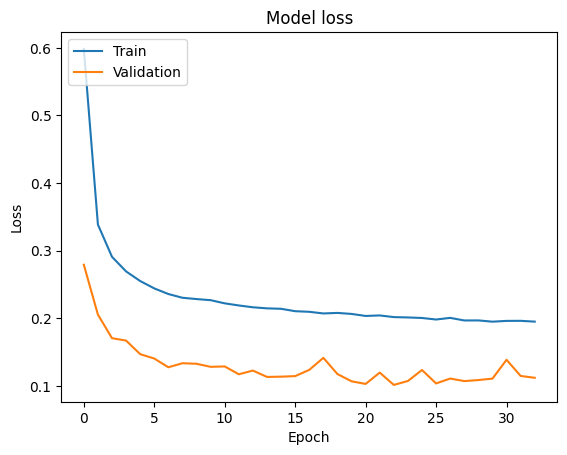

In [ ]:
# Define hyperparameters best lr 0.001
learning_rates = [0.001]
dropout_rates = [0.3]

# Loop over hyperparameters
for i in range(len(learning_rates)):
    lr = learning_rates[i]
    dropout_rate = dropout_rates[i]

    early_stopping = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
    optimizer = Adam(learning_rate=lr)

    # Definizione del modello sequenziale
    model = Sequential()
    model.add(Input(shape=(window_size, n_features)))  # Definisci l'input shape come primo layer
    model.add(LSTM(10, return_sequences=False))         # Il numero di unità (10) è un iperparametro
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model, this builds the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Now you can access the input after the model is built
    #layer_name = 'lstm'
    #intermediate_layer = model.get_layer(layer_name)
    #intermediate_layer_model = Model(inputs=model.input,
                                    #outputs=intermediate_layer.output)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [ ]:
#salva model in un file con joblib
import joblib
joblib.dump(model, 'lstm_trainata.joblib')


['lstm_trainata.joblib']

In [ ]:
# Ottieni le funzionalità LSTM per i dati di addestramento --> provare a dare in pasto una mia attivtà
lstm_features_train = intermediate_layer_model.predict(X_train)  # al posto di X_train una solo sessione

# Inizializza PCA con 2 componenti
pca = PCA(n_components=2)

# Adatta PCA alle funzionalità di addestramento e trasforma solo le funzionalità di addestramento
pca_result_train = pca.fit_transform(lstm_features_train)

# Ottieni le etichette di classe vere per i dati di training
true_classes_train = np.argmax(y_train, axis=1)

# Traccia i risultati solo per i dati di training
plt.figure()
plt.scatter(pca_result_train[:, 0], pca_result_train[:, 1], c=true_classes_train, alpha=0.2)
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
# Crea una lista di etichette per le classi
class_labels = ['Airplane', 'Car', 'Walking', 'Ignoring']  # Sostituisci con le tue etichette

# Crea un elenco di colori corrispondenti alle classi
colors = plt.cm.get_cmap('viridis', len(class_labels))  # Puoi scegliere una diversa mappa di colori se preferisci

# Crea un handle per ogni classe e colore
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors(i), markersize=10) for i, label in enumerate(class_labels)]

# Aggiungi la legenda al grafico
plt.legend(handles=handles, title='Classi')
plt.title('Visualizzazione PCA delle funzionalità LSTM')
plt.show()

2366/2366 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Predizioni: [3 3 3 ... 0 0 0]
Classi Vere: [3 3 3 ... 0 0 0]
Accuracy: 0.817847990912213
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76     18619
           1       0.94      0.87      0.90     20065
           2       0.74      0.55      0.63     19424
           3       0.96      0.99      0.97     17598

    accuracy                           0.82     75706
   macro avg       0.83      0.82      0.82     75706
weighted avg       0.82      0.82      0.81     75706

Confusion Matrix:
[[16348   353  1918     0]
 [  133 17422  1830   680]
 [ 7825   803 10654   142]
 [   17    33    56 17492]]


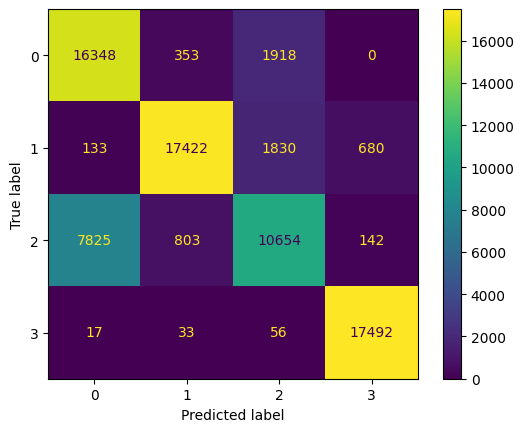

In [ ]:
predictions = model.predict(X_test)

# Convertire le predizioni in etichette di classe
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Stampare le predizioni
print("Predizioni:", predicted_classes)
print("Classi Vere:", true_classes)

# Calcolare l'accuratezza
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy}')
classification_rep = classification_report(true_classes, predicted_classes)
print(f'Classification Report:\n{classification_rep}')
# Calcolare la matrice di confusione
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)
# Puoi anche visualizzare la matrice di confusione con ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


Accuracy: 0.8203217880637236
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76     18617
           1       0.94      0.87      0.91     20065
           2       0.74      0.55      0.63     19424
           3       0.96      0.99      0.97     17596

    accuracy                           0.82     75702
   macro avg       0.83      0.82      0.82     75702
weighted avg       0.83      0.82      0.82     75702

Confusion Matrix:
[[16410   330  1877     0]
 [  138 17508  1750   669]
 [ 7902   692 10691   139]
 [   18    34    53 17491]]


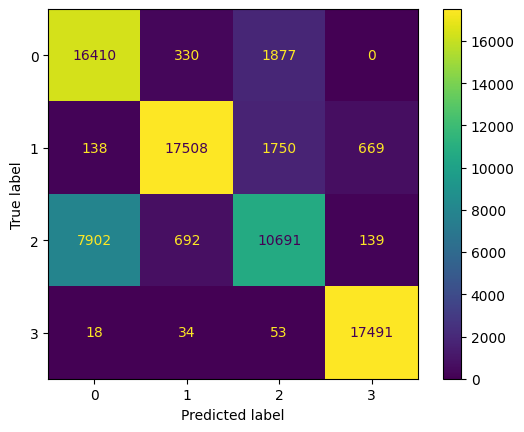

In [ ]:
def majority_voting(predictions, window_size=5): #30 window size -> almost 30 s
    """
    Applica il majority voting su una sequenza di predizioni.

    Args:
        predictions: Un array NumPy di predizioni.
        window_size: La dimensione della finestra per il voting.

    Returns:
        Un array NumPy di predizioni dopo il majority voting.
    """

    voted_predictions = []
    for i in range(len(predictions) - window_size + 1):
        window = predictions[i : i + window_size]
        # Trova l'etichetta più frequente nella finestra
        most_frequent_label = np.bincount(window).argmax()
        voted_predictions.append(most_frequent_label)

    return np.array(voted_predictions)

# Applica il majority voting alle classi vere
voted_true_classes = majority_voting(true_classes)
voted_predictions = majority_voting(predicted_classes)
# Assicurati che le predizioni votate e le classi vere votate abbiano la stessa lunghezza
min_length = min(len(voted_predictions), len(voted_true_classes))
voted_predictions = voted_predictions[:min_length]
voted_true_classes = voted_true_classes[:min_length]

# Calcola l'accuracy
accuracy = accuracy_score(voted_true_classes, voted_predictions)
print(f'Accuracy: {accuracy}')

# Calcola il classification report
classification_rep = classification_report(voted_true_classes, voted_predictions)
print(f'Classification Report:\n{classification_rep}')

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(voted_true_classes, voted_predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Puoi anche visualizzare la matrice di confusione con ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [ ]:
#per salvare modello in tflite - attualmente impossibile!!




# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('/content/modello_keras_trainato.h5')
# run_model = tf.function(lambda x: model(x))
# BATCH_SIZE = 1
# STEPS = window_size
# INPUT_SIZE = n_features
# concrete_func = run_model.get_concrete_function(
#     tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

# # Salva il modello in un formato compatibile
# MODEL_DIR = "keras_lstm"
# model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

# # Converti il modello
# converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# tflite_model = converter.convert()

# # Salva il modello TFLite
# with open('model9999999.tflite', 'wb') as f:
#     f.write(tflite_model)


In [ ]:
# #NEW MODEL

# new_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(window_size, n_features), name='input'),
#     tf.keras.layers.LSTM(10, time_major=False, return_sequences=False),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(n_classes, activation=tf.nn.softmax, name='output')
#     ])
# # Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# # Compile the model
# new_model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# new_model.summary()
# new_model.fit(X_train, y_train, epochs=100, batch_size=32,
#           validation_data=(X_val, y_val), callbacks=[early_stopping])


In [ ]:
# run_model = tf.function(lambda x: new_model(x))
# BATCH_SIZE = 1
# STEPS = window_size
# INPUT_SIZE = n_features
# concrete_func = run_model.get_concrete_function(
#     tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], new_model.inputs[0].dtype))

# # Salva il modello in un formato compatibile
# MODEL_DIR = "keras_lstm"
# new_model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

# # Converti il modello
# converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# tflite_model = converter.convert()

# # Salva il modello TFLite
# with open('last_model.tflite', 'wb') as f:
#     f.write(tflite_model)
